Time series modeling assumes a relationship between an observation and the previous observation.

Previous observations in a time series are called **lags**, with the observation at the previous time
step called $lag_1$, the observation at two time steps ago lag=2, and so on. 

A useful type of plot to explore the relationship between each observation and a lag of that observation is called the scatter plot. Pandas has a built-in function for exactly this called the lag plot. It plots the observation at time t on the x-axis and the observation at the next time step (t+1) on the y-axis.

In [1]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (20, 10)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

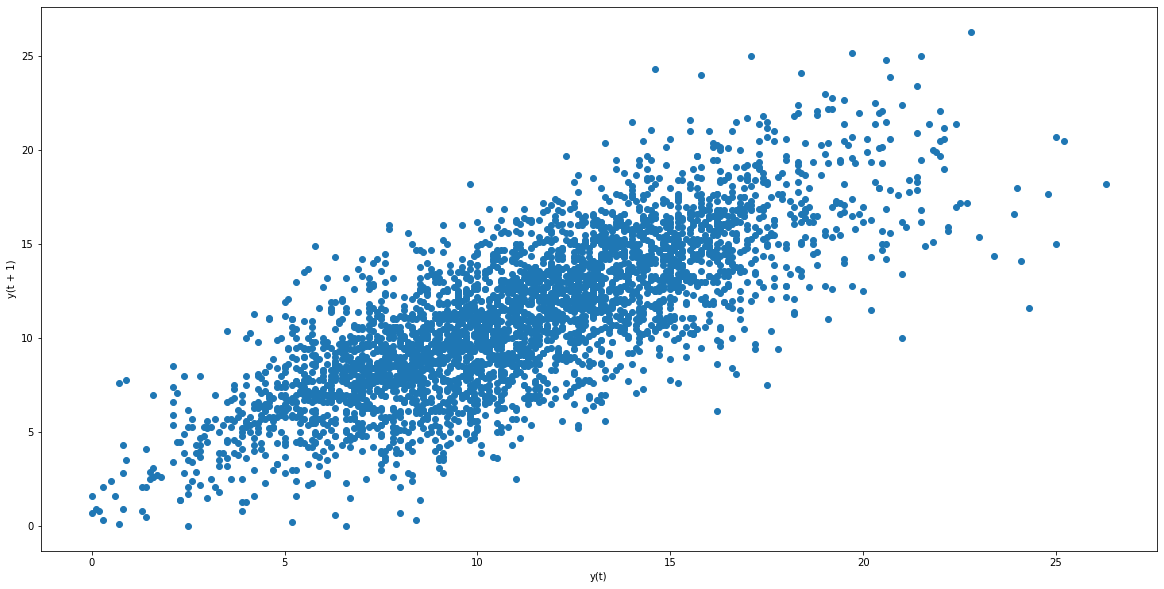

In [2]:
from pandas import read_csv
from pandas.plotting import lag_plot

series = read_csv('daily-minimum-temperatures.csv', 
                  header=0, index_col=0, parse_dates=True, squeeze=True)
lag_plot(series)

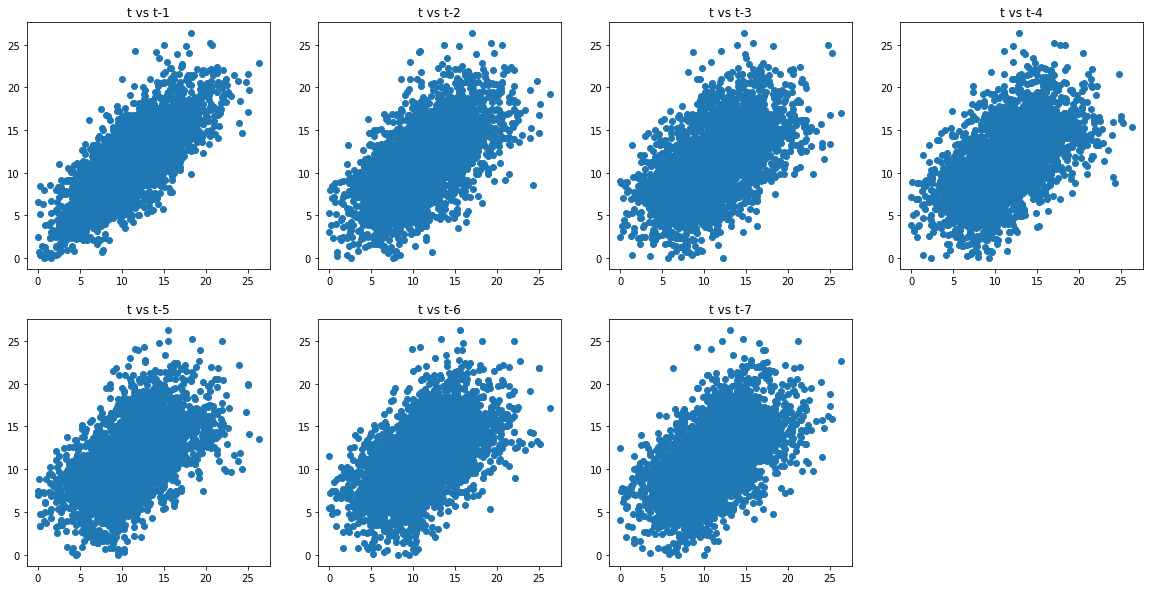

In [3]:
from pandas import read_csv, DataFrame, concat
from matplotlib import pyplot as plt

series = read_csv('daily-minimum-temperatures.csv', 
                  header=0, index_col=0, parse_dates=True, squeeze=True)
values = DataFrame(series.values)
lags = 7
columns = [values]

for i in range(1, lags+1):
    columns.append(values.shift(i))
    
dataframe = concat(columns, axis=1)
columns = ['t']
for i in range(1, lags+1):
    columns.append(f't-{i}')
dataframe.columns = columns

plt.figure(1)
for i in range(1, lags+1):
    ax = plt.subplot(240 + i)
    ax.set_title(f't vs t-{i}')
    plt.scatter(x=dataframe['t'].values, y=dataframe[f't-{i}'].values)